# **Soical Distance Detector (Google Colab)**
* We use a pre-trained model 'SSD MobileNet v2 320x320' model to detect persons in an image and predict their social distance, which is based on Tensorflow 2 Object Detection API.
* Social distance prediction will calculate the distances using the normalized coordinates from model and compare that distance with the distance threshold we defined(0.2) so that we can know if the person viloate the social distance
* Pre-setup for this Colab notebook so that it can be run successfully


> 1)   Create the main folder named 'SocialDistanceDetector' at your Google Drive and place 'test_images' folder under it

> 2) 'Hardware accelerator' under 'Notebook settings' needs to be set as 'None'






In [1]:
from google.colab import drive
 
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/'My Drive'/SocialDistanceDetector

Mounted at /content/gdrive
/content/gdrive/My Drive/SocialDistanceDetector


## **1. Install and Setup Tensorflow 2 Objetect Detection API**




In [2]:
!pip install tensorflow=="2.6.0"

     |████████████████████████████████| 458.3 MB 11 kB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=20c05906a71c15f26e8f70ca15553ee329b02e4579147d1175d18b8bcef0a6c3
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=cd4b6abae5cdf2d7e82279311f8005df9b3514a67f1ae0e2d60dde7ae0674096
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Successfully uninstalled wrapt-1.13.3
  Attempting uninstall: flatbuffers

In [3]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3081, done.
remote: Counting objects: 100% (3081/3081), done.
remote: Compressing objects: 100% (2610/2610), done.
remote: Total 3081 (delta 775), reused 1334 (delta 430), pack-reused 0
Receiving objects: 100% (3081/3081), 33.33 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (775/775), done.
Checking out files: 100% (2820/2820), done.


In [5]:
%cd /content/gdrive/'My Drive'/SocialDistanceDetector/models/research/

!pwd
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/gdrive/My Drive/SocialDistanceDetector/models/research
/content/gdrive/My Drive/SocialDistanceDetector/models/research
Processing /content/gdrive/My Drive/SocialDistanceDetector/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 6.2 MB/s 
     |████████████████████████████████| 352 kB 44.2 MB/s 
     |████████████████████████████████| 1.8 MB 52.3 MB/s 
     |████████████████████████████████| 22.7 MB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 42.2 MB/s 
     |████████████████████████████████| 213 kB 70.7 MB/s 
     |████████████████████████████████| 1.2 MB 18.6 MB

In [6]:
%cd /content/gdrive/'My Drive'/SocialDistanceDetector/models/research/

import os
os.environ['PYTHONPATH'] += '/content/gdrive/My Drive/SocialDistanceDetector/models/research/:/content/gdrive/My Drive/SocialDistanceDetector/models'


/content/gdrive/My Drive/SocialDistanceDetector/models/research


In [7]:
#For terminal command such as %cd, it can accept My Drive
#For python command, do change it as MyDrive instead of My Drive
!python /content/gdrive/MyDrive/SocialDistanceDetector/models/research/object_detection/builders/model_builder_tf2_test.py

2021-11-13 08:06:59.948536: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-13 08:06:59.948612: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6a7289c66b42): /proc/driver/nvidia/version does not exist
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-11-13 08:06:59.959686: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1113 08:07:00.368247 140649210705792 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2

## **2. Importing Python libraries and Object Detection libraries**

In [8]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

In [9]:
from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

import math
import itertools
from itertools import compress
from PIL import Image, ImageDraw

## **3. Model preparation**

**3.1 Download pretrained model 'ssd_mobilenet_v2_320x320'**

In [10]:
!mkdir /content/gdrive/'My Drive'/SocialDistanceDetector/models/research/pretrained_model
%cd /content/gdrive/'My Drive'/SocialDistanceDetector/models/research/pretrained_model

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!tar -xzf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz -C .

%cd /content/gdrive/'My Drive'/SocialDistanceDetector/models/research/

/content/gdrive/My Drive/SocialDistanceDetector/models/research/pretrained_model
--2021-11-13 08:07:56--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.170.128, 2607:f8b0:400c:c0d::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.170.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M  77.4MB/s    in 0.6s    

2021-11-13 08:07:56 (77.4 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]

/content/gdrive/My Drive/SocialDistanceDetector/models/research


**3.2 Setup variables**

In [11]:
# Model Name
MODEL_NAME = 'ssd_mobilenet_v2_320x320_coco17_tpu-8'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_INFERENCE = "/content/gdrive/My Drive/SocialDistanceDetector/models/research/pretrained_model/ssd_mobilenet_v2_320x320_coco17_tpu-8"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/gdrive/My Drive/SocialDistanceDetector/models/research/object_detection/data/mscoco_label_map.pbtxt'

**3.3 Load Tensorflow SavedModel into memory**

In [12]:

tf.keras.backend.clear_session()
detection_graph = tf.saved_model.load(f'/{PATH_TO_INFERENCE}/saved_model/')


**3.4 Loading label map**

In [13]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

## **4 Model Inference**

In [14]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [15]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS. Current code will test th image which file name is 'image8.jpg'
PATH_TO_TEST_IMAGES_DIR = '/content/gdrive/My Drive/SocialDistanceDetector/test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(8, 9) ]

# Size, in inches, of the output images.
#IMAGE_SIZE = (12, 8)

In [16]:
def run_inference_for_single_image(image,model):
    image = np.asarray(image)
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis,...]
    output_dict = model(input_tensor)
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
    if 'detection_masks' in output_dict:
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    return output_dict

In [18]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [21]:
# Return boxes with a confidence >= '0.5' and class index = 1(person)
def filter_boxes(min_score, boxes, scores, classes, categories):
 
  n = len(classes)
  idxs = []
  for i in range(n):
      if classes[i] in categories and scores[i] >= min_score:
          idxs.append(i)
  
  filtered_boxes = boxes[idxs, ...]
  filtered_scores = scores[idxs, ...]
  filtered_classes = classes[idxs, ...]
  return filtered_boxes, filtered_scores, filtered_classes

In [20]:
#This function will get the non-normalized coordinates of a box given that it considers the original image sizes
def normalize_coord(bbox, width, height):  
    xmin = bbox[1] * width
    ymin = bbox[0] * height
    xmax = bbox[3] * width
    ymax = bbox[2] * height

    return [ymin,xmin,ymax,xmax]

In [22]:
#Function to calculate the centroid
def calculate_centroid(bounding_box):
  return (((bounding_box[3]-bounding_box[1])/2)+bounding_box[1],((bounding_box[2]-bounding_box[0])/2)+bounding_box[0])

In [23]:
#Calculate distance between 2 centroids
def calculate_centr_distances(centroid_1, centroid_2):
  return  math.sqrt((centroid_2[0]-centroid_1[0])**2 + (centroid_2[1]-centroid_1[1])**2)

In [24]:
#Calculate all permutations between the centroids
def calculate_perm(centroids):
  permutations = []
  for current_permutation in itertools.permutations(centroids, 2):
    if current_permutation[::-1] not in permutations:
      permutations.append(current_permutation)

  return permutations

In [25]:
#Main function to calculate the distance and predict the social distance
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from random import randrange

def show_inference_calculating_distance(image_path):
  distance_treshold = 0.2
  person_class = 1
  score_treshold = 0.5
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)

  # Get boxes only for person  
  boxes, scores, classes = filter_boxes(score_treshold, output_dict['detection_boxes'], output_dict['detection_scores'], output_dict['detection_classes'], [person_class])
  boxes = np.array(boxes)
  classes = np.array(classes)
  scores = np.array(scores)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      boxes,
      classes,
      scores,
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=1,
      min_score_thresh=score_treshold)
  # Get width and heigth
  im = Image.fromarray(image_np)
  width, height = im.size
  
  #person_centr_coord=[]
  centroids_non_normalized = []
  centroids_normalized = []  
  coordinates_normlized = []
  for box in boxes:
    centroids_non_normalized.append(calculate_centroid(box))
    coord = normalize_coord(box, width, height)
    print(coord)
    centroids_normalized.append(calculate_centroid(coord))
    coordinates_normlized.append(coord)
  

  # Calculate all permutations
  permutations = calculate_perm(centroids_non_normalized)


  # Display lines between centroids
  draw = ImageDraw.Draw(im)
  centroid_list=[]
  coord_list=[]
  for perm in permutations:        
    dist = calculate_centr_distances(perm[0], perm[1])
    if dist<distance_treshold:      
      print(dist)
      two_centr_normal=[]
      for centr_no_normal,centr_normal, coord in zip(centroids_non_normalized,centroids_normalized,coordinates_normlized):                
        if centr_no_normal==perm[0] or centr_no_normal==perm[1]:          
          two_centr_normal.append(centr_normal)
          if centr_normal not in centroid_list:
            centroid_list.append(centr_normal)
          if coord not in coord_list:
            coord_list.append(coord)       
     
      draw.line((two_centr_normal[0],two_centr_normal[1]), fill=255, width=3)     
  for centroid in centroid_list:
    draw.ellipse((centroid[0],centroid[1],centroid[0]+3,centroid[1]+3),fill='yellow',outline='yellow',width=20)
  for coord in coord_list:
    #xmin,ymax,xmax,ymin
    draw.rectangle((coord[1],coord[2],coord[3],coord[0]),outline='red',width=3) 
          
  
  display(im)
  

[206.46397268772125, 416.3054656982422, 414.37763273715973, 522.4456024169922]
[143.04652404785156, 276.53690338134766, 416.4365646839142, 374.90970611572266]
[227.03970789909363, 180.5910301208496, 425.31077909469604, 277.38317489624023]
0.1835363956121063


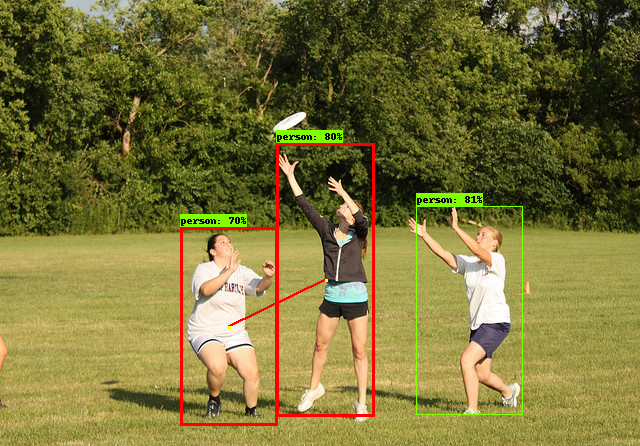

In [26]:
# Make prediction
for file in TEST_IMAGE_PATHS:
  show_inference_calculating_distance(file)